Saving imdb_top_1000.csv to imdb_top_1000 (10).csv
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crim

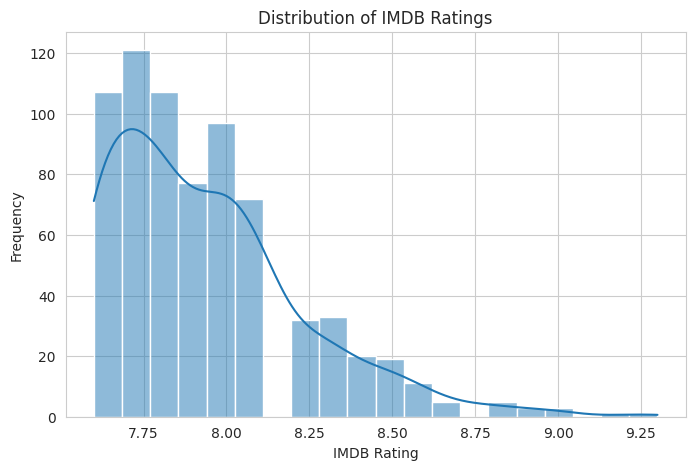

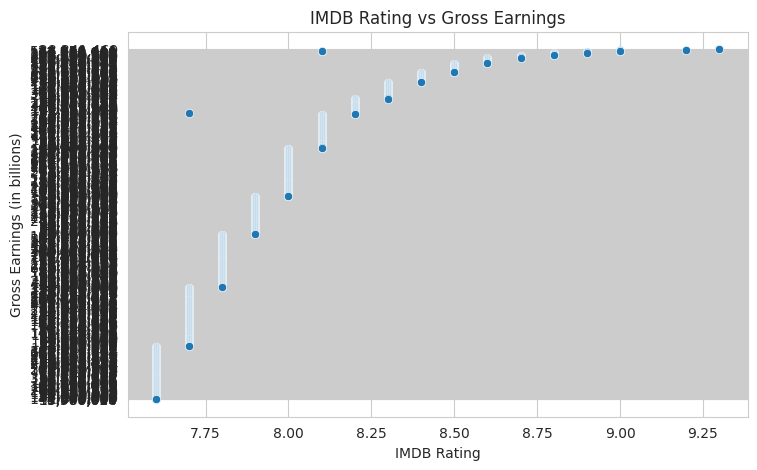


Drama        500
Adventure    163
Comedy       161
Crime        142
Action       140
Thriller      99
Biography     88
Romance       88
Mystery       70
Animation     63
Sci-Fi        56
Fantasy       55
Family        43
History       38
War           29
Music         27
Horror        18
Sport         17
Western       16
Musical       11
Film-Noir      6
Name: count, dtype: int64



<ipython-input-14-2ed3563ca793>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='coolwarm')


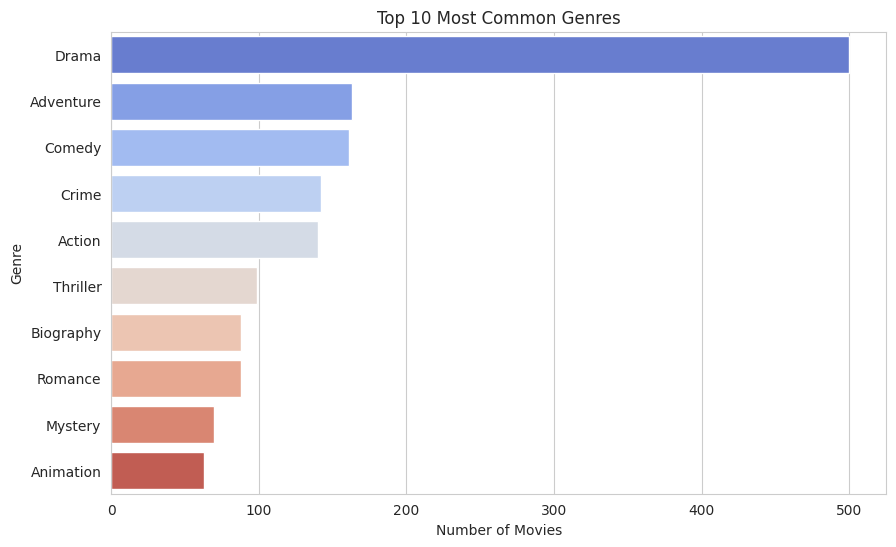

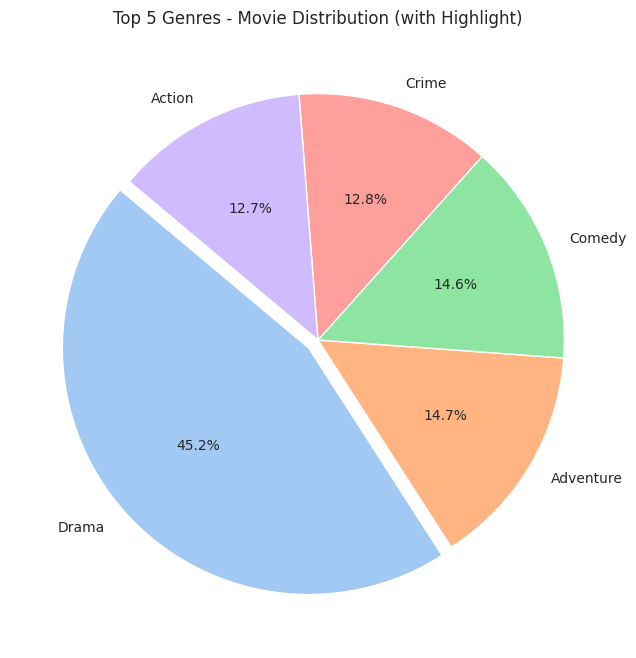

In [14]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload() # Opens a button to upload files manually

print(movies.head()) # Shows the first 5 rows
print()

print(movies.info()) # Checks general info
print()

print(movies.isnull().sum()) # Check for missing values
print()

print(movies.describe()) # Prints basic statistics
print()

movies_clean = movies.dropna() # Drops rows with any missing values

# Check the shape after cleaning
print("Original shape:", movies.shape)
print()

print("New shape after dropping missing:", movies_clean.shape)
print()

print(movies_clean.isnull().sum()) # Check for missing values
print()

sns.set_style('whitegrid')

# Histogram of IMDB Ratings
plt.figure(figsize=(8,5))
sns.histplot(movies_clean['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()
print()

# Scatter plot: Gross vs IMDB Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=movies_clean)
plt.title('IMDB Rating vs Gross Earnings')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross Earnings (in billions)')
plt.show()
print()

# Count of movies per individual genre
all_genres = []

for genres in movies_clean['Genre']:
    split_genres = genres.split(',')
    for genre in split_genres:
        all_genres.append(genre.strip())  # .strip() removes extra spaces
genre_counts = pd.Series(all_genres).value_counts()
print(genre_counts)
print()

# Plot top 10 genres
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='coolwarm')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()
print()

# Plot a pie chart of the top 5 genres
top5_genres = genre_counts.head(5)

explode = (0.05, 0, 0, 0, 0)  # Only explode the first slice

plt.figure(figsize=(8,8))
plt.pie(
    top5_genres.values,
    labels=top5_genres.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel'),
    explode=explode
)
plt.title('Top 5 Genres - Movie Distribution (with Highlight)')
plt.show()
